In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/Mojtabaei/Downloads/auto-mpg.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
cdf = df[['displacement', 'weight', 'mpg']]

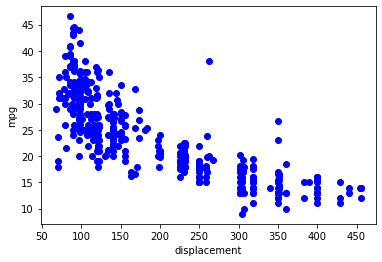

In [20]:
plt.scatter(cdf.displacement, cdf.mpg, color='blue')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show()

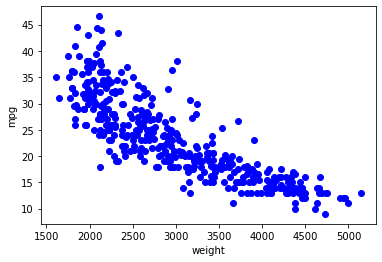

In [21]:
plt.scatter(cdf.weight, cdf.mpg, color='blue')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [49]:
from sklearn.preprocessing import PolynomialFeatures
train_x = np.asanyarray(train[['weight']])
train_y = np.asanyarray(train[['mpg']])
test_x = np.asanyarray(test[['weight']])
test_y = np.asanyarray(test[['mpg']])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)

In [50]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_y_ = regr.fit(train_x_poly, train_y)

print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficient:  [[ 0.00000000e+00 -1.72613973e-02  1.51900215e-06]]
Intercept:  [60.2814127]


Text(0, 0.5, 'mpg')

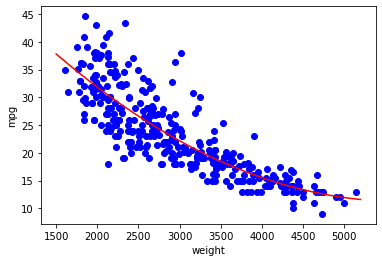

In [51]:
plt.scatter(train.weight, train.mpg, color='blue')
xx = np.arange(1500, 5200, 0.1)
yy = regr.intercept_[0] + regr.coef_[0][1]*xx + regr.coef_[0][2]* np.power(xx, 2)
plt.plot(xx, yy, '-r')
plt.xlabel('weight')
plt.ylabel('mpg')

In [52]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = regr.predict(test_x_poly)
print('R2 Score: %.2f'% r2_score(test_y, test_y_))

R2 Score: 0.74
